# Autonomous Reforestation Robot (ML Model) for PDE4433_CW2

In [123]:
# Import libs
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_text # this is used to show the DT Tree
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics # this is to find the accuracy score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [124]:
df = pd.read_csv("../data/raw/crop_and_soil_dataSet.csv")
print("Dataset size: ", df.shape)
df.head()

Dataset size:  (8000, 9)


,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26.0,52.0,38.0,Sandy,Maize,37,0,0,Urea
1,29.0,52.0,45.0,Loamy,Sugarcane,12,0,36,DAP
2,34.0,65.0,62.0,Black,Cotton,7,9,30,14-35-14
3,32.0,62.0,34.0,Red,Tobacco,22,0,20,28-28
4,28.0,54.0,46.0,Clayey,Paddy,35,0,0,Urea


array([[<Axes: title={'center': 'Temparature'}>,
        <Axes: title={'center': 'Humidity'}>],
       [<Axes: title={'center': 'Moisture'}>,
        <Axes: title={'center': 'Nitrogen'}>],
       [<Axes: title={'center': 'Potassium'}>,
        <Axes: title={'center': 'Phosphorous'}>]], dtype=object)

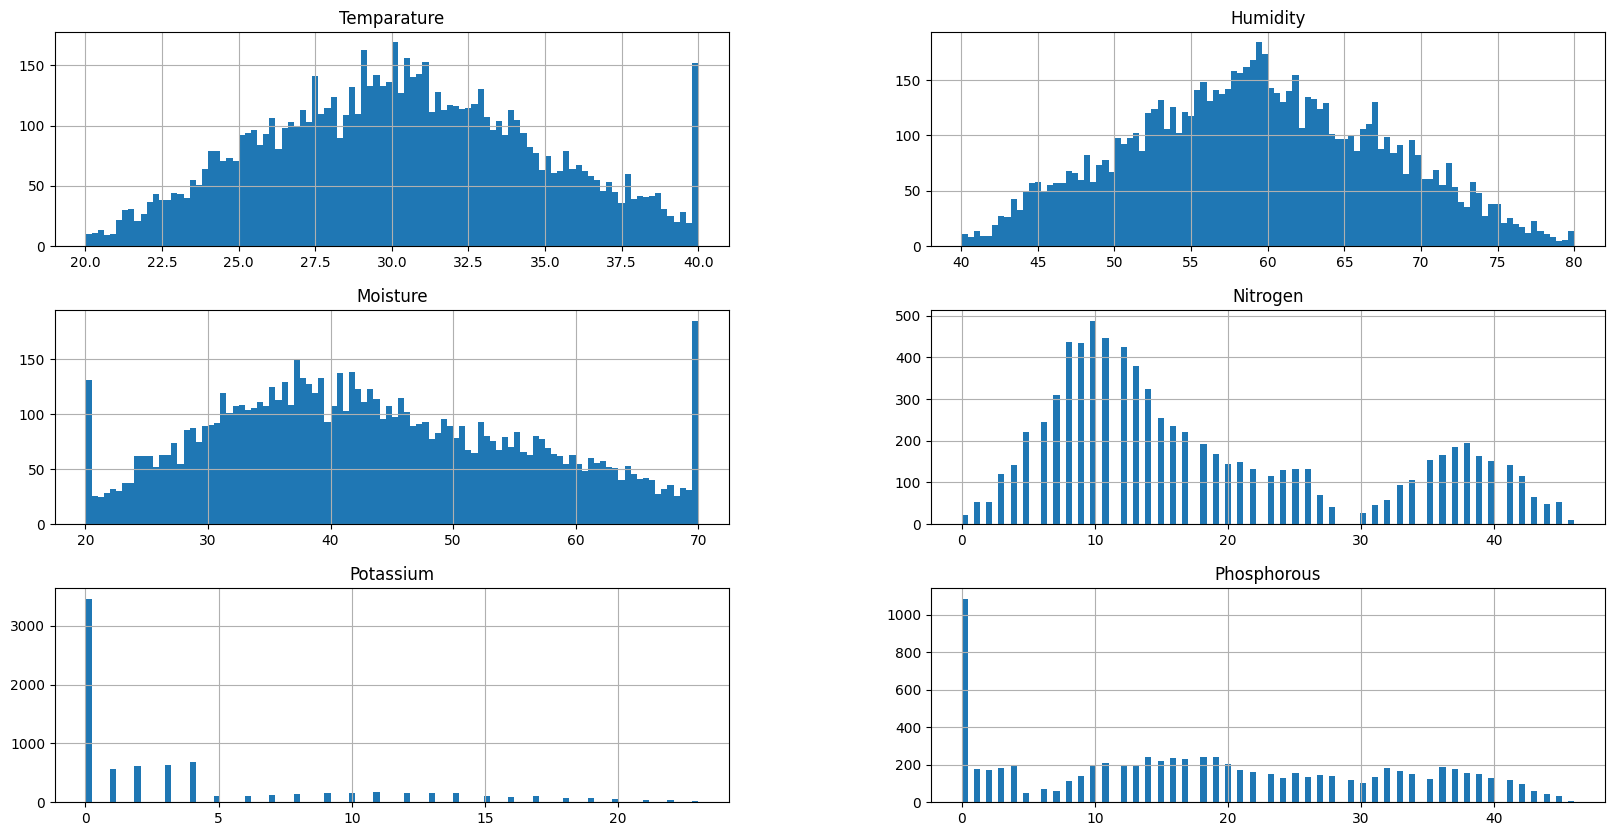

In [125]:
# Check data how scattaed
df.hist(bins=100, figsize=(20,10))

Almost data scatted well and look there is no inbalanced. Need to check duplicates and null values.

In [126]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7995    False
7996    False
7997    False
7998    False
7999    False
Length: 8000, dtype: bool

In [127]:
df.isna().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

No duplicates or null values. Able to continue.

In [128]:
# Check the columns
df.columns

Index(['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

In [129]:
# Check the first model input types.
count = df["Soil Type"].value_counts()
print(count)

Soil Type
Clayey    1623
Black     1613
Red       1594
Loamy     1590
Sandy     1580
Name: count, dtype: int64


First model should input only 5 types as above. Should be Clayey, Black, Red, Loamy or Sandy as soil type to this model.

## Model Training Start

### First model will be Decison Tree

In [130]:
print(df.columns)

Index(['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')


In [131]:
# The 'Fertilizer Name' variable will not be utilized, as we already have detailed soil nutrient information 
# available, including Nitrogen, Potassium, and Phosphorous levels.
x1_feature = ['Temparature','Humidity','Moisture','Soil Type', 'Nitrogen', 'Potassium', 'Phosphorous']
y1_feature = ['Crop Type']

# Initialize LabelEncoder for categorical features
label_encoder = LabelEncoder()

# Apply label encoding to 'Soil Type' (the categorical feature)
df['Soil Type'] = label_encoder.fit_transform(df['Soil Type'])

print(x1_feature)
print(y1_feature)

x1 = df.loc[:, x1_feature].values
y1 = df.loc[:, y1_feature].values

print("X1 Shape: " , x1.shape)
print("Y1 Shape: " , y1.shape)

['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Nitrogen', 'Potassium', 'Phosphorous']
['Crop Type']
X1 Shape:  (8000, 7)
Y1 Shape:  (8000, 1)


In [132]:
# Split data into train and test. trainin size decided to be 70% of data 
X_train, X_test, Y_train, Y_test = train_test_split(x1, y1, test_size=0.3, random_state=0)

print("X_train shape : " , X_train.shape)
print("X_test shape : " , X_test.shape)
print("Y_train shape : " , Y_train.shape)
print("Y_test shape : " , Y_test.shape)

X_train shape :  (5600, 7)
X_test shape :  (2400, 7)
Y_train shape :  (5600, 1)
Y_test shape :  (2400, 1)


In [133]:
# Model Training start
from sklearn.tree import DecisionTreeClassifier

decisionTree_model = DecisionTreeClassifier(random_state=0)
decisionTree_model = decisionTree_model.fit(X_train, Y_train)

# print the tree structure using the export_text() function, more about this function is found here
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_text.html

tree = export_text(decisionTree_model, feature_names = x1_feature )
print(tree)

|--- Moisture <= 48.25
|   |--- Potassium <= 1.50
|   |   |--- Moisture <= 43.75
|   |   |   |--- Temparature <= 22.01
|   |   |   |   |--- Humidity <= 53.20
|   |   |   |   |   |--- Nitrogen <= 17.50
|   |   |   |   |   |   |--- Moisture <= 32.66
|   |   |   |   |   |   |   |--- Humidity <= 46.00
|   |   |   |   |   |   |   |   |--- class: Tobacco
|   |   |   |   |   |   |   |--- Humidity >  46.00
|   |   |   |   |   |   |   |   |--- class: Sugarcane
|   |   |   |   |   |   |--- Moisture >  32.66
|   |   |   |   |   |   |   |--- Soil Type <= 2.50
|   |   |   |   |   |   |   |   |--- class: Paddy
|   |   |   |   |   |   |   |--- Soil Type >  2.50
|   |   |   |   |   |   |   |   |--- Phosphorous <= 21.00
|   |   |   |   |   |   |   |   |   |--- class: Paddy
|   |   |   |   |   |   |   |   |--- Phosphorous >  21.00
|   |   |   |   |   |   |   |   |   |--- class: Millets
|   |   |   |   |   |--- Nitrogen >  17.50
|   |   |   |   |   |   |--- Humidity <= 48.69
|   |   |   |   |   |   |   |

In [134]:
#Predict the output for the test dataset and print the accuracy of the predicted values
# print the accuracy

Y_pred = decisionTree_model.predict(X_test)
# print(Y_pred)

print("Train Accuracy Model_DT: ", decisionTree_model.score(X_train, Y_train))
dt_accuracy = metrics.accuracy_score(Y_test, Y_pred)

print("Test Accuracy: ",dt_accuracy)
print(f'Accuracy of the Decision tree model on the test set: {dt_accuracy * 100:.2f}%')

Train Accuracy Model_DT:  1.0
Test Accuracy:  0.09666666666666666
Accuracy of the Decision tree model on the test set: 9.67%


In [274]:
# Save model
import joblib
joblib.dump(decisionTree_model, '../models/decision_tree_model.pkl')

['../models/decision_tree_model.pkl']

<br>
Since the training accuracy hit maximum. Need to avoid overfitting and need to improve the test accuracy.
<br>
<br>

In [135]:
# Re-train the model to avoid overfittig
from sklearn.tree import DecisionTreeClassifier

decisionTree_model = DecisionTreeClassifier(random_state=0, max_depth=32)
decisionTree_model = decisionTree_model.fit(X_train, Y_train)


# Predict the output for the test dataset and print the accuracy of the predicted values
# print the accuracy

Y_pred = decisionTree_model.predict(X_test)
# print(Y_pred)

print("Train Accuracy Model_DT: ", decisionTree_model.score(X_train, Y_train))
dt_accuracy = metrics.accuracy_score(Y_test, Y_pred)

print("Test Accuracy: ",dt_accuracy)
print(f'Accuracy of the Decision tree model on the test set: {dt_accuracy * 100:.2f}%')

Train Accuracy Model_DT:  0.9944642857142857
Test Accuracy:  0.09875
Accuracy of the Decision tree model on the test set: 9.88%


<br>
Training accuracy controlled by avoiding overfitting. But Test accuracy is not improving need to try with another model.
<br><br>

### Second model going to test is RandomForestClassifier

In [136]:
# Create a RandomForest Classifier with 100 trees.

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Y_train = Y_train.ravel()
Y_test = Y_test.ravel()

print("X training data:\n", X_train[:5])
print("\n")
print("Y training data:\n", Y_train[:5])
print("\n")
print("X test data:\n", X_test[:5])
print("\n")
print("Y test data:\n", Y_test[:5])
print("\n")

print("\n --- Going to predict --- \n")

# Model initializing
rf_Model = RandomForestClassifier(n_estimators=100, random_state=0)

# Fit the model with data
rf_Model = rf_Model.fit(X_train, Y_train)

# # Print prediction
y_predict_rf = rf_Model.predict(X_test)

print("Y test data:\n", Y_test[:5])
print("\n")
print("Y predict data:\n", y_predict_rf[:5])
print("\n")

print(" --- Accuracy --- \n")

rf_accuracy = accuracy_score(Y_test, y_predict_rf)
# print(accuracy)
print(f'Accuracy of the Random Forest model on the test set: {rf_accuracy * 100:.2f}%')

X training data:
 [[23.22 49.73 51.54  1.   20.    0.   22.  ]
 [26.8  46.32 34.25  4.   35.    2.    0.  ]
 [28.35 64.21 60.8   4.    5.    6.   30.  ]
 [33.29 72.81 38.08  3.    5.   19.   25.  ]
 [24.39 44.49 39.38  2.   25.    2.   21.  ]]


Y training data:
 ['Pulses' 'Sugarcane' 'Tobacco' 'Tobacco' 'Millets']


X test data:
 [[40.   79.57 38.94  0.    8.   11.   26.  ]
 [31.15 59.56 27.97  0.    9.    4.   38.  ]
 [29.69 68.57 47.16  2.   13.    0.   11.  ]
 [28.44 55.23 33.64  3.   24.    0.   17.  ]
 [31.6  67.29 67.06  1.   12.    7.   29.  ]]


Y test data:
 ['Oil seeds' 'Cotton' 'Wheat' 'Ground Nuts' 'Maize']



 --- Going to predict --- 

Y test data:
 ['Oil seeds' 'Cotton' 'Wheat' 'Ground Nuts' 'Maize']


Y predict data:
 ['Sugarcane' 'Wheat' 'Wheat' 'Wheat' 'Wheat']


 --- Accuracy --- 

Accuracy of the Random Forest model on the test set: 9.58%


<br>
Even in Decison Tree model of Random Forest model is not having a good accuracy for test data. This effect to the future prediction and can be effect final result. 
<br><br>

## Re-Examine the dataset

array([[<Axes: title={'center': 'Temparature'}>,
        <Axes: title={'center': 'Humidity'}>,
        <Axes: title={'center': 'Moisture'}>],
       [<Axes: title={'center': 'Soil Type'}>,
        <Axes: title={'center': 'Nitrogen'}>,
        <Axes: title={'center': 'Potassium'}>],
       [<Axes: title={'center': 'Phosphorous'}>, <Axes: >, <Axes: >]],
      dtype=object)

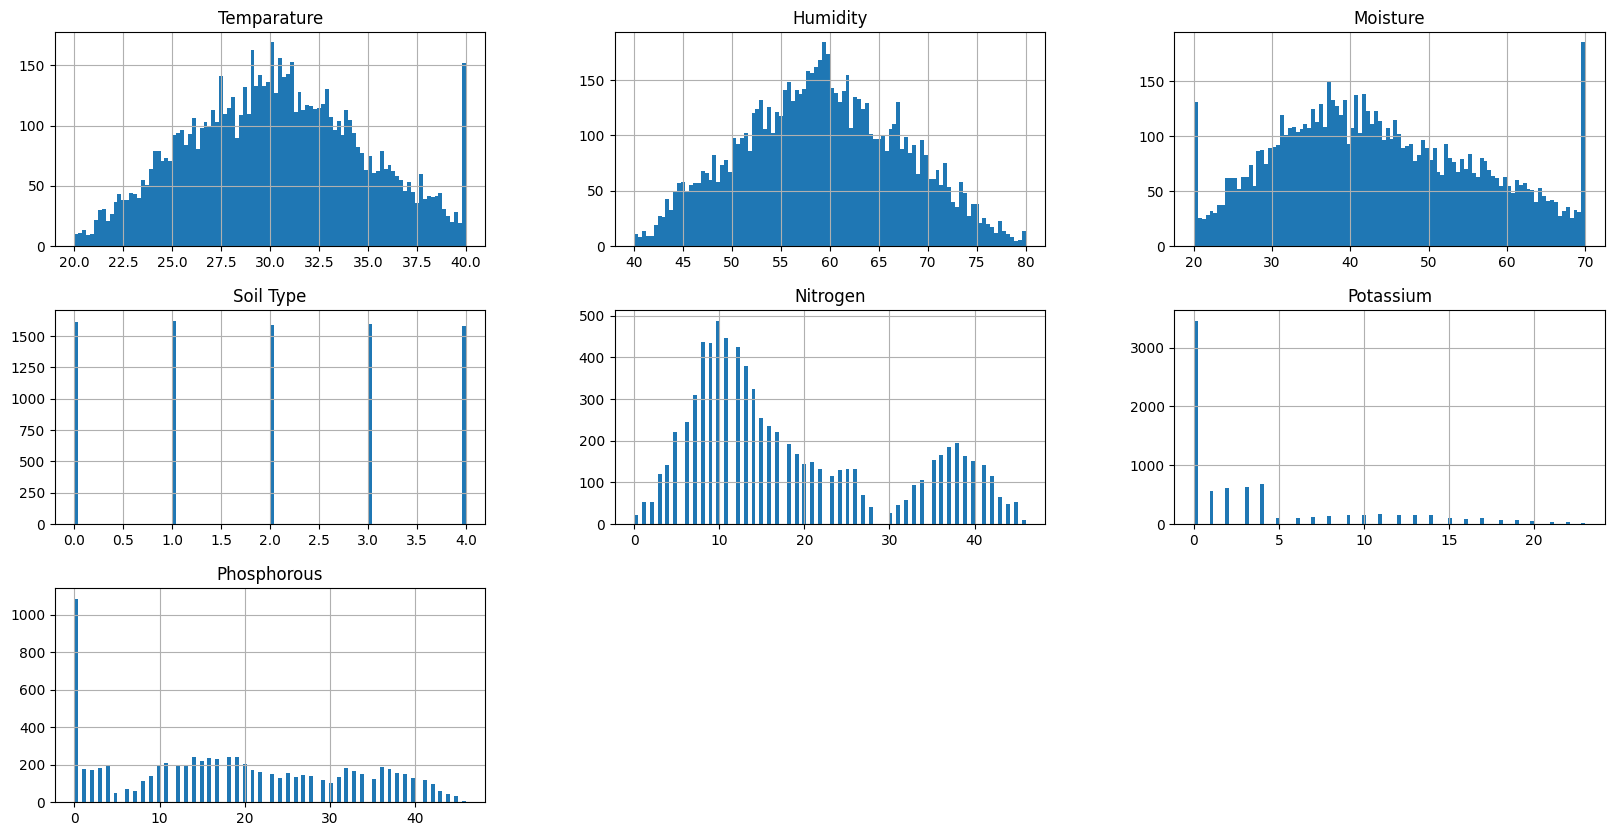

In [137]:
df.hist(figsize=(20,10), bins=100)

In [138]:
print(df.columns)

Index(['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')


In [139]:
df.dtypes

Temparature        float64
Humidity           float64
Moisture           float64
Soil Type            int64
Crop Type           object
Nitrogen             int64
Potassium            int64
Phosphorous          int64
Fertilizer Name     object
dtype: object

In [140]:
df['Phosphorous'].isna().sum()

np.int64(0)

<Axes: xlabel='index', ylabel='Phosphorous'>

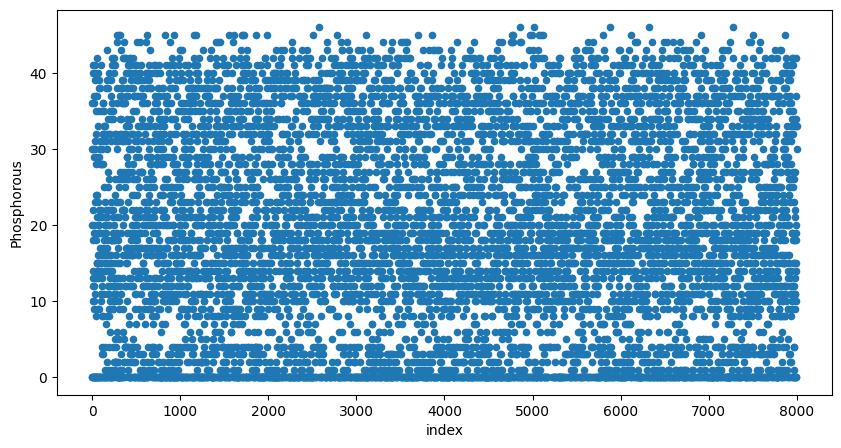

In [141]:
df.reset_index().plot(kind='scatter', y='Phosphorous', x='index', figsize=(10,5))

In [142]:
df[(df["Phosphorous"] == 0)].value_counts()

Temparature  Humidity  Moisture  Soil Type  Crop Type  Nitrogen  Potassium  Phosphorous  Fertilizer Name
40.00        80.00     59.99     1          Cotton     42        0          0            10-26-26           1
20.05        52.70     59.86     0          Oil seeds  36        0          0            10-26-26           1
20.28        44.28     64.04     0          Maize      33        4          0            17-17-17           1
20.36        57.92     61.02     1          Pulses     37        0          0            10-26-26           1
20.45        45.71     55.91     3          Tobacco    40        0          0            DAP                1
                                                                                                           ..
22.18        52.62     21.23     4          Pulses     31        2          0            14-35-14           1
22.15        60.48     34.02     2          Sugarcane  33        0          0            28-28              1
             57

<Axes: xlabel='index', ylabel='Phosphorous'>

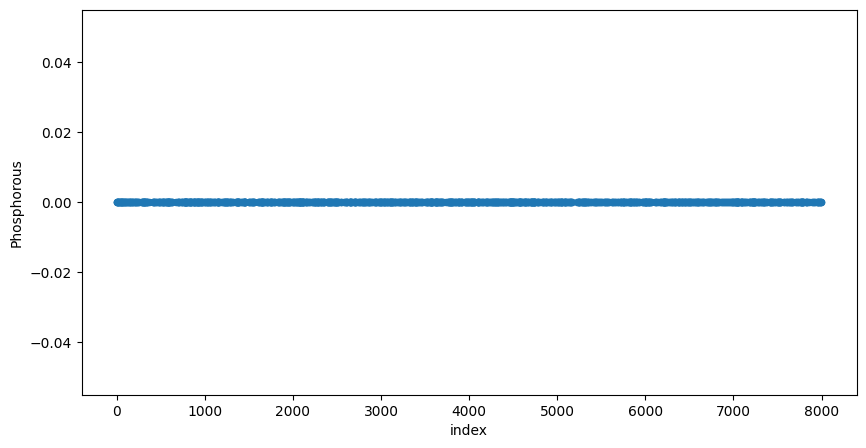

In [143]:
df[df["Phosphorous"]==0].reset_index().plot(kind='scatter', y='Phosphorous', x='index', figsize=(10,5))

In [144]:
df['Potassium'].isna().sum()

np.int64(0)

<Axes: xlabel='index', ylabel='Potassium'>

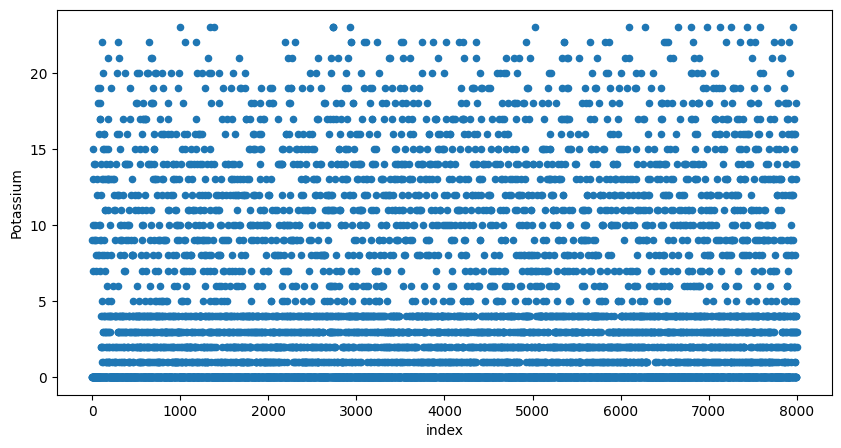

In [145]:
df.reset_index().plot(kind='scatter', y='Potassium', x='index', figsize=(10,5))

In [146]:
df[(df["Potassium"] == 0)].value_counts()

Temparature  Humidity  Moisture  Soil Type  Crop Type  Nitrogen  Potassium  Phosphorous  Fertilizer Name
40.00        80.00     59.99     1          Cotton     42        0          0            10-26-26           1
20.03        52.64     70.00     4          Sugarcane  13        0          13           20-20              1
20.05        52.70     59.86     0          Oil seeds  36        0          0            10-26-26           1
20.18        41.05     47.98     3          Sugarcane  25        0          21           17-17-17           1
40.00        74.03     39.34     2          Paddy      8         0          17           10-26-26           1
                                                                                                           ..
20.34        48.15     42.35     3          Millets    16        0          23           14-35-14           1
20.30        54.28     45.30     3          Pulses     18        0          21           14-35-14           1
20.27        48

<Axes: xlabel='index', ylabel='Potassium'>

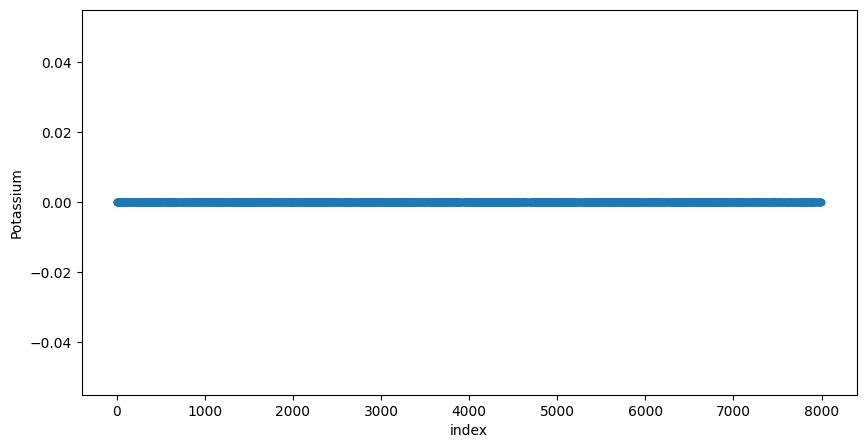

In [147]:
df[df["Potassium"]==0].reset_index().plot(kind='scatter', y='Potassium', x='index', figsize=(10,5))

<br>
Looks like Phosphorous and Potassium level have 0 vlaues. As per the below data source, these nutrients level can not be 0.<br>
<i>Brady, N. C., & Weil, R. R. (2016). The Nature and Properties of Soils (15th ed.). Pearson.</i>
<br><br>

## Feature Engineerig for Phosphorous
### Change Phosphorous
Phosphorous can not be 0. This datase have almost 1086 sample out of 8000 samples which have 0 values. I am going to replace then with interpolate values while sorting them as the general combination.

There is a Proportional between Phosphorus level with humidity, temperature, nitrogen and moisture levels below. I use these pattern to sort and fill the 0s.

In [201]:
# Sort the Data by the 'Temperature' column
df_sorted = df.sort_values(by='Temparature')

In [202]:
df_sorted['temp_sort_Phosphorous'] = df_sorted['Phosphorous']
df_sorted.columns
df_sorted.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name,temp_sort_Phosphorous
3997,20.00,55.62,31.35,2,Barley,9,20,16,17-17-17,16
2581,20.03,52.64,70.00,4,Sugarcane,13,0,13,20-20,13
7411,20.05,52.70,59.86,0,Oil seeds,36,0,0,10-26-26,0
4913,20.09,57.36,36.23,1,Sugarcane,10,17,18,14-35-14,18
4802,20.09,49.43,29.64,0,Pulses,17,11,11,14-35-14,11


In [203]:
import numpy as np

# Replace values in 'temp_sort_Phosphorous' where 'Phosphorous' is 0 with NaN
df_sorted['temp_sort_Phosphorous'] = df_sorted.apply(
    lambda row: row['Phosphorous'] if row['Phosphorous'] != 0 else np.nan, axis=1
)

In [204]:
df_sorted.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name,temp_sort_Phosphorous
3997,20.00,55.62,31.35,2,Barley,9,20,16,17-17-17,16.0
2581,20.03,52.64,70.00,4,Sugarcane,13,0,13,20-20,13.0
7411,20.05,52.70,59.86,0,Oil seeds,36,0,0,10-26-26,NaN
4913,20.09,57.36,36.23,1,Sugarcane,10,17,18,14-35-14,18.0
4802,20.09,49.43,29.64,0,Pulses,17,11,11,14-35-14,11.0


In [205]:
df_sorted['temp_sort_Phosphorous'] = df_sorted['temp_sort_Phosphorous'].interpolate()
df_sorted.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name,temp_sort_Phosphorous
3997,20.00,55.62,31.35,2,Barley,9,20,16,17-17-17,16.0
2581,20.03,52.64,70.00,4,Sugarcane,13,0,13,20-20,13.0
7411,20.05,52.70,59.86,0,Oil seeds,36,0,0,10-26-26,15.5
4913,20.09,57.36,36.23,1,Sugarcane,10,17,18,14-35-14,18.0
4802,20.09,49.43,29.64,0,Pulses,17,11,11,14-35-14,11.0


In [206]:
# Sort the DataFrame by the 'Nitrogen' column
df_sorted = df_sorted.sort_values(by='Nitrogen')

In [207]:
df_sorted['nitr_sort_Phosphorous'] = df_sorted['Phosphorous']
df_sorted.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name,temp_sort_Phosphorous,nitr_sort_Phosphorous
3531,29.77,66.60,24.94,2,Ground Nuts,0,21,15,DAP,15.0,15
4917,33.95,66.85,45.81,2,Oil seeds,0,13,32,Urea,32.0,32
7448,29.14,69.95,21.50,2,Ground Nuts,0,16,17,10-26-26,17.0,17
921,27.60,56.81,32.67,4,Pulses,0,14,20,DAP,20.0,20
3820,32.81,55.45,48.08,2,Millets,0,16,15,28-28,15.0,15


In [208]:
import numpy as np

# Replace values in 'nitr_sort_Phosphorous' where 'Phosphorous' is 0 with NaN
df_sorted['nitr_sort_Phosphorous'] = df_sorted.apply(
    lambda row: row['Phosphorous'] if row['Phosphorous'] != 0 else np.nan, axis=1
)

In [209]:
df_sorted['nitr_sort_Phosphorous'] = df_sorted['nitr_sort_Phosphorous'].interpolate()
df_sorted.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name,temp_sort_Phosphorous,nitr_sort_Phosphorous
3531,29.77,66.60,24.94,2,Ground Nuts,0,21,15,DAP,15.0,15.0
4917,33.95,66.85,45.81,2,Oil seeds,0,13,32,Urea,32.0,32.0
7448,29.14,69.95,21.50,2,Ground Nuts,0,16,17,10-26-26,17.0,17.0
921,27.60,56.81,32.67,4,Pulses,0,14,20,DAP,20.0,20.0
3820,32.81,55.45,48.08,2,Millets,0,16,15,28-28,15.0,15.0


In [210]:
# Sort the DataFrame by the 'Moisture' column
df_sorted = df_sorted.sort_values(by='Moisture')

df_sorted['mois_sort_Phosphorous'] = df_sorted['Phosphorous']
print(df_sorted.columns)
print()
print(df_sorted.head())

import numpy as np

# Replace values in 'mois_sort_Phosphorous' where 'Phosphorous' is 0 with NaN
df_sorted['mois_sort_Phosphorous'] = df_sorted.apply(
    lambda row: row['Phosphorous'] if row['Phosphorous'] != 0 else np.nan, axis=1
)

df_sorted['mois_sort_Phosphorous'] = df_sorted['mois_sort_Phosphorous'].interpolate()
print(df_sorted.head())

Index(['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name',
       'temp_sort_Phosphorous', 'nitr_sort_Phosphorous',
       'mois_sort_Phosphorous'],
      dtype='object')

      Temparature  Humidity  Moisture  Soil Type  Crop Type  Nitrogen  \
6592        26.36     64.53      20.0          0  Sugarcane         0   
455         32.66     55.25      20.0          3      Paddy         0   
3229        28.93     58.65      20.0          2  Sugarcane        13   
1416        23.40     62.09      20.0          1    Millets         9   
4484        29.16     50.81      20.0          0    Millets         7   

      Potassium  Phosphorous Fertilizer Name  temp_sort_Phosphorous  \
6592         21           19        17-17-17                   19.0   
455          13           16        10-26-26                   16.0   
3229          2           37           20-20                   37.0   
1416          3           

In [211]:
# Sort the DataFrame by the 'Humidity' column
df_sorted = df_sorted.sort_values(by='Humidity')

df_sorted['humd_sort_Phosphorous'] = df_sorted['Phosphorous']
print(df_sorted.columns)
print()
print(df_sorted.head())

import numpy as np

# Replace values in 'temp_sort_Phosphorous' where 'Phosphorous' is 0 with NaN
df_sorted['humd_sort_Phosphorous'] = df_sorted.apply(
    lambda row: row['Phosphorous'] if row['Phosphorous'] != 0 else np.nan, axis=1
)

df_sorted['humd_sort_Phosphorous'] = df_sorted['humd_sort_Phosphorous'].interpolate()
df_sorted.head()

Index(['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name',
       'temp_sort_Phosphorous', 'nitr_sort_Phosphorous',
       'mois_sort_Phosphorous', 'humd_sort_Phosphorous'],
      dtype='object')

      Temparature  Humidity  Moisture  Soil Type Crop Type  Nitrogen  \
4215        28.24     40.02     40.05          3    Pulses         1   
7001        27.53     40.07     31.84          4    Pulses        14   
1623        28.76     40.17     64.52          4   Millets        14   
7653        21.26     40.17     21.00          2     Wheat        13   
430         24.06     40.20     34.24          0     Wheat         2   

      Potassium  Phosphorous Fertilizer Name  temp_sort_Phosphorous  \
4215         17           15           20-20                   15.0   
7001         10           15           28-28                   15.0   
1623         10           15           20-20                   15.0   
7653   

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name,temp_sort_Phosphorous,nitr_sort_Phosphorous,mois_sort_Phosphorous,humd_sort_Phosphorous
4215,28.24,40.02,40.05,3,Pulses,1,17,15,20-20,15.0,15.0,15.0,15.0
7001,27.53,40.07,31.84,4,Pulses,14,10,15,28-28,15.0,15.0,15.0,15.0
1623,28.76,40.17,64.52,4,Millets,14,10,15,20-20,15.0,15.0,15.0,15.0
7653,21.26,40.17,21.00,2,Wheat,13,10,12,14-35-14,12.0,12.0,12.0,12.0
430,24.06,40.20,34.24,0,Wheat,2,19,12,10-26-26,12.0,12.0,12.0,12.0


In [212]:
df_sorted.columns

Index(['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name',
       'temp_sort_Phosphorous', 'nitr_sort_Phosphorous',
       'mois_sort_Phosphorous', 'humd_sort_Phosphorous'],
      dtype='object')

checking null values if available for newly created columns.

In [213]:
df_sorted.isna().sum()

Temparature              0
Humidity                 0
Moisture                 0
Soil Type                0
Crop Type                0
Nitrogen                 0
Potassium                0
Phosphorous              0
Fertilizer Name          0
temp_sort_Phosphorous    0
nitr_sort_Phosphorous    0
mois_sort_Phosphorous    0
humd_sort_Phosphorous    0
dtype: int64

In [214]:
# Get the average value from the newly created columns
df_sorted['final_Phosphorous'] = (df_sorted['temp_sort_Phosphorous'] + df_sorted['nitr_sort_Phosphorous'] + df_sorted['mois_sort_Phosphorous'] + df_sorted['humd_sort_Phosphorous'])
df_sorted['final_Phosphorous'] = df_sorted['final_Phosphorous'] / 4
df_sorted.columns

Index(['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name',
       'temp_sort_Phosphorous', 'nitr_sort_Phosphorous',
       'mois_sort_Phosphorous', 'humd_sort_Phosphorous', 'final_Phosphorous'],
      dtype='object')

In [216]:
df_sorted.isna().sum()

Temparature              0
Humidity                 0
Moisture                 0
Soil Type                0
Crop Type                0
Nitrogen                 0
Potassium                0
Phosphorous              0
Fertilizer Name          0
temp_sort_Phosphorous    0
nitr_sort_Phosphorous    0
mois_sort_Phosphorous    0
humd_sort_Phosphorous    0
final_Phosphorous        0
dtype: int64

In [217]:
# Unnecessary columns will be removed to streamline the dataset and ensure more efficient processing.
df_sorted = df_sorted.drop(columns=['temp_sort_Phosphorous', 'nitr_sort_Phosphorous', 'mois_sort_Phosphorous', 'humd_sort_Phosphorous'])

In [218]:
df_sorted.columns

Index(['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name',
       'final_Phosphorous'],
      dtype='object')

In [220]:
df_sorted.isna().sum()

Temparature          0
Humidity             0
Moisture             0
Soil Type            0
Crop Type            0
Nitrogen             0
Potassium            0
Phosphorous          0
Fertilizer Name      0
final_Phosphorous    0
dtype: int64

There is no null values. Since we can move to next stage.

### Change Potassium
Potassium can not be 0. This datase have almost 3460 sample out of 8000 samples which have 0 values. I am going to replace then with interpolate values while sorting them as the general combination.

In [221]:
df_pt_sorted = df_sorted.copy()
df_pt_sorted.head

<bound method NDFrame.head of       Temparature  Humidity  Moisture  Soil Type  Crop Type  Nitrogen  \
4215        28.24     40.02     40.05          3     Pulses         1   
7001        27.53     40.07     31.84          4     Pulses        14   
1623        28.76     40.17     64.52          4    Millets        14   
7653        21.26     40.17     21.00          2      Wheat        13   
430         24.06     40.20     34.24          0      Wheat         2   
...           ...       ...       ...        ...        ...       ...   
7191        38.48     80.00     59.16          3  Oil seeds        37   
293         40.00     80.00     59.99          1     Cotton        42   
2006        33.88     80.00     54.46          0  Oil seeds        35   
7597        34.48     80.00     52.95          3    Tobacco        41   
7373        40.00     80.00     53.26          4  Sugarcane        39   

      Potassium  Phosphorous Fertilizer Name  final_Phosphorous  
4215         17           1

In [223]:
df_pt_sorted[(df_pt_sorted["Potassium"]==0)].shape

(3460, 10)

In [224]:
df_pt_sorted.columns

Index(['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name',
       'final_Phosphorous'],
      dtype='object')

In [228]:
# Sort the DataFrame by the 'Humidity' column
df_pt_sorted = df_pt_sorted.sort_values(by='Humidity', ascending=False)

df_pt_sorted['humd_sort_Potassium'] = df_pt_sorted['Potassium']
print(df_pt_sorted.columns)
print()
print(df_pt_sorted.head())

import numpy as np

# Replace values in 'humd_sort_Potassium' where 'Potassium' is 0 with NaN
df_pt_sorted['humd_sort_Potassium'] = df_pt_sorted.apply(
    lambda row: row['Potassium'] if row['Potassium'] != 0 else np.nan, axis=1
)

df_pt_sorted['humd_sort_Potassium'] = df_pt_sorted['humd_sort_Potassium'].interpolate()
print(df_pt_sorted.head())

Index(['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name',
       'final_Phosphorous', 'humd_sort_Potassium', 'nitr_sort_Potassium',
       'temp_sort_Potassium'],
      dtype='object')

      Temparature  Humidity  Moisture  Soil Type  Crop Type  Nitrogen  \
7191        38.48      80.0     59.16          3  Oil seeds        37   
7373        40.00      80.0     53.26          4  Sugarcane        39   
2444        40.00      80.0     55.43          1      Paddy        42   
2006        33.88      80.0     54.46          0  Oil seeds        35   
3107        40.00      80.0     50.64          1     Pulses        36   

      Potassium  Phosphorous Fertilizer Name  final_Phosphorous  \
7191          0            0            Urea          20.562500   
7373          0            4        17-17-17           4.000000   
2444          4            0             DAP          19.958333   
2006          0            

In [229]:
# Sort the DataFrame by the 'Temparature' column
df_pt_sorted = df_pt_sorted.sort_values(by='Temparature')

df_pt_sorted['temp_sort_Potassium'] = df_pt_sorted['Potassium']
print(df_pt_sorted.columns)
print()
print(df_pt_sorted.head())

import numpy as np

# Replace values in 'temp_sort_Phosphorous' where 'Phosphorous' is 0 with NaN
df_pt_sorted['temp_sort_Potassium'] = df_pt_sorted.apply(
    lambda row: row['Potassium'] if row['Potassium'] != 0 else np.nan, axis=1
)

df_pt_sorted['temp_sort_Potassium'] = df_pt_sorted['temp_sort_Potassium'].interpolate()
print(df_pt_sorted.head())

Index(['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name',
       'final_Phosphorous', 'humd_sort_Potassium', 'nitr_sort_Potassium',
       'temp_sort_Potassium'],
      dtype='object')

      Temparature  Humidity  Moisture  Soil Type  Crop Type  Nitrogen  \
3997        20.00     55.62     31.35          2     Barley         9   
2581        20.03     52.64     70.00          4  Sugarcane        13   
7411        20.05     52.70     59.86          0  Oil seeds        36   
4913        20.09     57.36     36.23          1  Sugarcane        10   
4802        20.09     49.43     29.64          0     Pulses        17   

      Potassium  Phosphorous Fertilizer Name  final_Phosphorous  \
3997         20           16        17-17-17            16.0000   
2581          0           13           20-20            13.0000   
7411          0            0        10-26-26            14.0625   
4913         17           1

In [230]:
# Sort the DataFrame by the 'Nitrogen' column
df_pt_sorted = df_pt_sorted.sort_values(by='Nitrogen')

df_pt_sorted['nitr_sort_Potassium'] = df_pt_sorted['Potassium']
print(df_pt_sorted.columns)
print()
print(df_pt_sorted.head())

import numpy as np

# Replace values in 'nitr_sort_Potassium' where 'Potassium' is 0 with NaN
df_pt_sorted['nitr_sort_Potassium'] = df_pt_sorted.apply(
    lambda row: row['Potassium'] if row['Potassium'] != 0 else np.nan, axis=1
)

df_pt_sorted['nitr_sort_Potassium'] = df_pt_sorted['nitr_sort_Potassium'].interpolate()
print(df_pt_sorted.head())

Index(['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name',
       'final_Phosphorous', 'humd_sort_Potassium', 'nitr_sort_Potassium',
       'temp_sort_Potassium'],
      dtype='object')

      Temparature  Humidity  Moisture  Soil Type    Crop Type  Nitrogen  \
4677        30.46     71.86     41.95          1        Wheat         0   
6592        26.36     64.53     20.00          0    Sugarcane         0   
1512        26.20     54.23     41.59          3    Oil seeds         0   
455         32.66     55.25     20.00          3        Paddy         0   
7540        31.99     68.10     31.15          2  Ground Nuts         0   

      Potassium  Phosphorous Fertilizer Name  final_Phosphorous  \
4677          7           28        10-26-26               28.0   
6592         21           19        17-17-17               19.0   
1512         14           14           20-20               14.0   
455          13

In [231]:
# Sort the DataFrame by the 'Moisture' column
df_pt_sorted = df_pt_sorted.sort_values(by='Moisture')

df_pt_sorted['mois_sort_Potassium'] = df_pt_sorted['Potassium']
print(df_pt_sorted.columns)
print()
print(df_pt_sorted.head())

import numpy as np

# Replace values in 'temp_sort_Phosphorous' where 'Phosphorous' is 0 with NaN
df_pt_sorted['mois_sort_Potassium'] = df_pt_sorted.apply(
    lambda row: row['Potassium'] if row['Potassium'] != 0 else np.nan, axis=1
)

df_pt_sorted['mois_sort_Potassium'] = df_pt_sorted['mois_sort_Potassium'].interpolate()
print(df_pt_sorted.head())

Index(['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name',
       'final_Phosphorous', 'humd_sort_Potassium', 'nitr_sort_Potassium',
       'temp_sort_Potassium', 'mois_sort_Potassium'],
      dtype='object')

      Temparature  Humidity  Moisture  Soil Type Crop Type  Nitrogen  \
1033        28.84     59.50      20.0          3     Wheat         9   
6189        27.35     57.23      20.0          3     Paddy        15   
5120        34.20     73.24      20.0          1     Maize        11   
3779        27.05     61.36      20.0          0    Barley         7   
4419        33.90     50.25      20.0          3   Millets         7   

      Potassium  Phosphorous Fertilizer Name  final_Phosphorous  \
1033          0           35           20-20               35.0   
6189          2           38            Urea               38.0   
5120          9           30        14-35-14               30.0   
3779      

In [232]:
print(df_pt_sorted.columns)

Index(['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name',
       'final_Phosphorous', 'humd_sort_Potassium', 'nitr_sort_Potassium',
       'temp_sort_Potassium', 'mois_sort_Potassium'],
      dtype='object')


In [233]:
df_pt_sorted.isna().sum()

Temparature            0
Humidity               0
Moisture               0
Soil Type              0
Crop Type              0
Nitrogen               0
Potassium              0
Phosphorous            0
Fertilizer Name        0
final_Phosphorous      0
humd_sort_Potassium    2
nitr_sort_Potassium    0
temp_sort_Potassium    0
mois_sort_Potassium    1
dtype: int64

In [234]:
# Filling null values by average
df_pt_sorted['humd_sort_Potassium'] = df_pt_sorted['humd_sort_Potassium'].fillna(df_pt_sorted['humd_sort_Potassium'].mean())
df_pt_sorted['mois_sort_Potassium'] = df_pt_sorted['mois_sort_Potassium'].fillna(df_pt_sorted['mois_sort_Potassium'].mean())

In [235]:
df_pt_sorted.isna().sum()

Temparature            0
Humidity               0
Moisture               0
Soil Type              0
Crop Type              0
Nitrogen               0
Potassium              0
Phosphorous            0
Fertilizer Name        0
final_Phosphorous      0
humd_sort_Potassium    0
nitr_sort_Potassium    0
temp_sort_Potassium    0
mois_sort_Potassium    0
dtype: int64

In [236]:
df_pt_sorted['final_Potassium'] = (df_pt_sorted['humd_sort_Potassium'] + df_pt_sorted['temp_sort_Potassium'] + df_pt_sorted['nitr_sort_Potassium'] + df_pt_sorted['mois_sort_Potassium'])
df_pt_sorted['final_Potassium'] = df_pt_sorted['final_Potassium'] / 4
df_pt_sorted.columns

Index(['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name',
       'final_Phosphorous', 'humd_sort_Potassium', 'nitr_sort_Potassium',
       'temp_sort_Potassium', 'mois_sort_Potassium', 'final_Potassium'],
      dtype='object')

In [237]:
df_pt_sorted.isna().sum()

Temparature            0
Humidity               0
Moisture               0
Soil Type              0
Crop Type              0
Nitrogen               0
Potassium              0
Phosphorous            0
Fertilizer Name        0
final_Phosphorous      0
humd_sort_Potassium    0
nitr_sort_Potassium    0
temp_sort_Potassium    0
mois_sort_Potassium    0
final_Potassium        0
dtype: int64

In [238]:
df_pt_sorted = df_pt_sorted.drop(columns=['humd_sort_Potassium', 'temp_sort_Potassium', 'nitr_sort_Potassium', 'mois_sort_Potassium'])

In [239]:
df_pt_sorted.columns

Index(['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name',
       'final_Phosphorous', 'final_Potassium'],
      dtype='object')

<Axes: xlabel='index', ylabel='final_Phosphorous'>

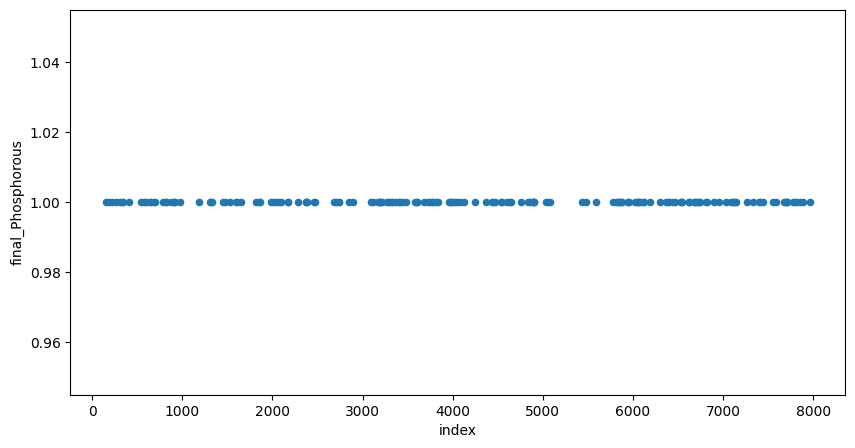

In [243]:
df_pt_sorted[(df_pt_sorted["final_Phosphorous"]<2)].reset_index().plot(kind='scatter', y='final_Phosphorous', x='index', figsize=(10,5))

<Axes: xlabel='index', ylabel='final_Potassium'>

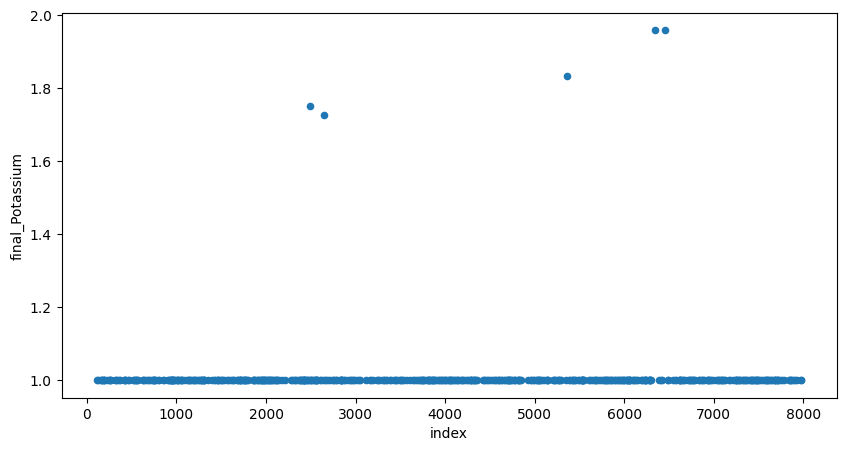

In [245]:
df_pt_sorted[(df_pt_sorted["final_Potassium"]<2)].reset_index().plot(kind='scatter', y='final_Potassium', x='index', figsize=(10,5))

In [246]:
df_pt_sorted[(df_pt_sorted['Phosphorous'] == 0) | (df_pt_sorted['Potassium'] == 0)].value_counts()

Temparature  Humidity  Moisture  Soil Type  Crop Type    Nitrogen  Potassium  Phosphorous  Fertilizer Name  final_Phosphorous  final_Potassium
40.00        80.00     59.99     1          Cotton       42        0          0            10-26-26         15.333333          4.466667           1
20.03        52.64     70.00     4          Sugarcane    13        0          13           20-20            13.000000          6.625000           1
20.05        52.70     59.86     0          Oil seeds    36        0          0            10-26-26         14.062500          7.833333           1
20.18        41.05     47.98     3          Sugarcane    25        0          21           17-17-17         21.000000          8.062500           1
             49.80     27.78     3          Maize        21        0          14           17-17-17         14.000000          6.250000           1
                                                                                                                     

In [247]:
df_pt_sorted[(df_pt_sorted['final_Phosphorous'] == 0) | (df_pt_sorted['final_Potassium'] == 0)].value_counts()

Series([], Name: count, dtype: int64)

# Start with new dataset

In [248]:
df_final=df_pt_sorted.copy()

In [249]:
df_final.columns

Index(['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name',
       'final_Phosphorous', 'final_Potassium'],
      dtype='object')

In [250]:
df_final.dtypes

Temparature          float64
Humidity             float64
Moisture             float64
Soil Type              int64
Crop Type             object
Nitrogen               int64
Potassium              int64
Phosphorous            int64
Fertilizer Name       object
final_Phosphorous    float64
final_Potassium      float64
dtype: object

In [252]:
x1_final_feature = ['Temparature','Humidity', 'Moisture', 'Nitrogen', 'final_Potassium', 'final_Phosphorous']
y1_final_feature = ['Crop Type']

print(x1_final_feature)
print(y1_final_feature)

x1_final = df_final.loc[:, x1_final_feature].values
y1_final = df_final.loc[:, y1_final_feature].values

print("X1 Shape: " , x1_final.shape)
print("Y1 Shape: " , y1_final.shape)

['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'final_Potassium', 'final_Phosphorous']
['Crop Type']
X1 Shape:  (8000, 6)
Y1 Shape:  (8000, 1)


In [253]:
# Split the dataset (both X and y) into training set and test set using the train_test_split() function

X_train_final, X_test_final, Y_train_final, Y_test_final = train_test_split(x1_final, y1_final, test_size=0.3, random_state=0)


print("X_train shape : " , X_train_final.shape)
print("X_test shape : " , X_test_final.shape)
print("Y_train shape : " , Y_train_final.shape)
print("Y_test shape : " , Y_test_final.shape)

X_train shape :  (5600, 6)
X_test shape :  (2400, 6)
Y_train shape :  (5600, 1)
Y_test shape :  (2400, 1)


<br>

### <u>Effet with DecisionTree</u>
<br>

In [268]:
from sklearn.tree import DecisionTreeClassifier

decisionTree_model = DecisionTreeClassifier(random_state=0, max_depth=33)
decisionTree_model = decisionTree_model.fit(X_train_final, Y_train_final)

Y_pred_final = decisionTree_model.predict(X_test_final)
# print(Y_pred)

print("Train Accuracy Model_DT: ", decisionTree_model.score(X_train_final, Y_train_final))
dt_accuracy_final = metrics.accuracy_score(Y_test_final, Y_pred_final)

print("Test Accuracy: ",dt_accuracy_final)
print(f'Accuracy of the Decision tree model on the test set: {dt_accuracy_final * 100:.2f}%')

Train Accuracy Model_DT:  0.9967857142857143
Test Accuracy:  0.09708333333333333
Accuracy of the Decision tree model on the test set: 9.71%


<br>

### <u>Effert with RandomForestClassifier</u>
<br>

In [272]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Y_train_final = Y_train_final.ravel()
Y_test_final = Y_test_final.ravel()

print("X training data:\n", X_train_final[:5])
print("\n")
print("Y training data:\n", Y_train_final[:5])
print("\n")
print("X test data:\n", X_test_final[:5])
print("\n")
print("Y test data:\n", Y_test_final[:5])
print("\n")

print("\n --- Going to predict --- \n")

# Create the model - Random Forest
rf_Model = RandomForestClassifier(n_estimators=100, random_state=0)

# Fit the model with data
rf_Model = rf_Model.fit(X_train_final, Y_train_final)

# Print prediction
y_predict_rf = rf_Model.predict(X_test_final)

print("Y test data:\n", Y_test_final[:5])
print("\n")
print("Y predict data:\n", y_predict_rf[:5])
print("\n")

print(" --- Accuracy --- \n")

rf_accuracy = accuracy_score(Y_test_final, y_predict_rf)
print(rf_accuracy)
print(f'Accuracy of the Random Forest model on the test set: {rf_accuracy * 100:.2f}%')

X training data:
 [[26.39       58.76       26.14       39.          7.0875     19.23611111]
 [23.69       44.73       48.52       18.          1.         17.        ]
 [38.77       55.67       55.59       14.         18.         11.        ]
 [28.12       66.34       32.71       10.          1.         13.        ]
 [31.33       52.44       48.45       40.          7.84444444  2.        ]]


Y training data:
 ['Sugarcane' 'Pulses' 'Paddy' 'Millets' 'Maize']


X test data:
 [[30.7        57.71       38.36        9.          4.         18.        ]
 [27.51       61.71       32.46       32.          2.         12.70833333]
 [26.71       54.         55.47       17.          5.         30.        ]
 [38.43       75.91       25.65       14.          4.         36.        ]
 [40.         75.07       38.95       17.          2.         18.        ]]


Y test data:
 ['Wheat' 'Wheat' 'Oil seeds' 'Tobacco' 'Sugarcane']



 --- Going to predict --- 

Y test data:
 ['Wheat' 'Wheat' 'Oil seeds' 'To

<br>
<b><i>Even after modifying the features, accuracy not improving.</i></b>
<br><br>